In [3]:
#import libraries 

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration plots we will be creating 

#Read in the data 

df = pd.read_csv('movies.csv')




In [33]:
# Let's look at the data 

df.head()


<bound method NDFrame.head of       name  rating  genre  year  released  score    votes  director  writer  \
5445   387       5      0  2009       528    7.8  1100000       787    1265   
7445   389       5      0  2019       138    8.4   903000       106     515   
3045  4923       5      6  1997       535    7.8  1100000       787    1265   
6663  3656       5      0  2015       530    7.8   876000       770    1810   
7244   390       5      0  2018       146    8.4   897000       106     515   
...    ...     ...    ...   ...       ...    ...      ...       ...     ...   
2434  2981       5      0  1993      1471    4.5     1900      1810    3112   
3681  1599       3      6  2000      1726    6.8    43000       954    1687   
272   2921       6      9  1982      1530    3.9     2300       263      55   
2417  2401      -1      6  1993        64    7.3     5100        23    1220   
3203  4980       5      4  1997      2158    5.7     5800       653     161   

      star  country  

In [5]:
# Looking for any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [6]:
#Data types for our columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Dropping NA values from bidget and gross
df.dropna(subset=['budget'], inplace=True)
df.dropna(subset=['gross'], inplace=True)

#Changinf data type of columns 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


In [8]:
df =df.sort_values(by=['gross'], inplace = False, ascending = False)

pd.set_option('display.max_rows', None)

In [9]:
# Budget high correlation 
# Company high correlation 


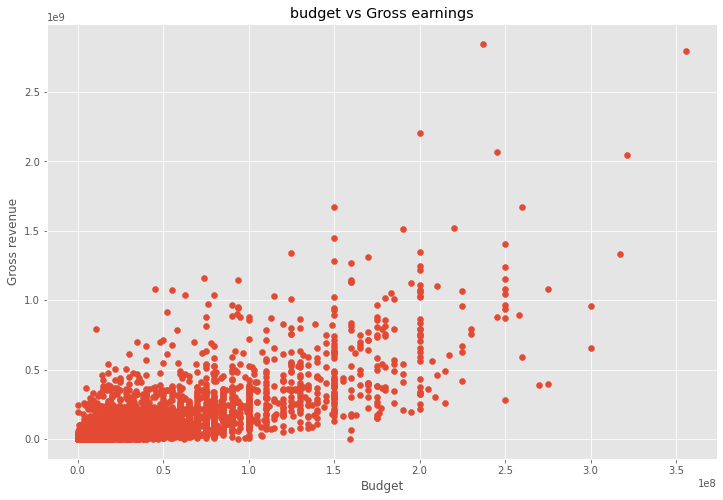

In [10]:
# Scatter plot with budget vs gross revenue 

plt.scatter( x = df['budget'] , y = df['gross'])

plt.title('budget vs Gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross revenue')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

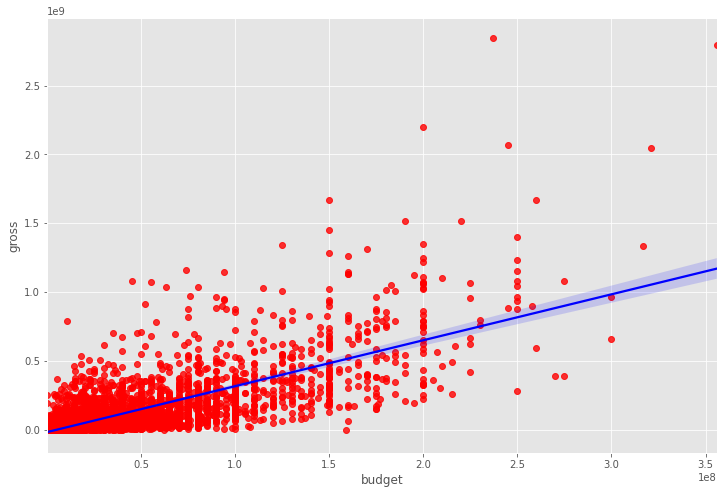

In [11]:
# Plot the budget vs gross using seaborn
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

In [14]:
# check correlation between variables
df.corr(method = "pearson") 

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [ ]:
# High correlation between budget and gross, votes and gross

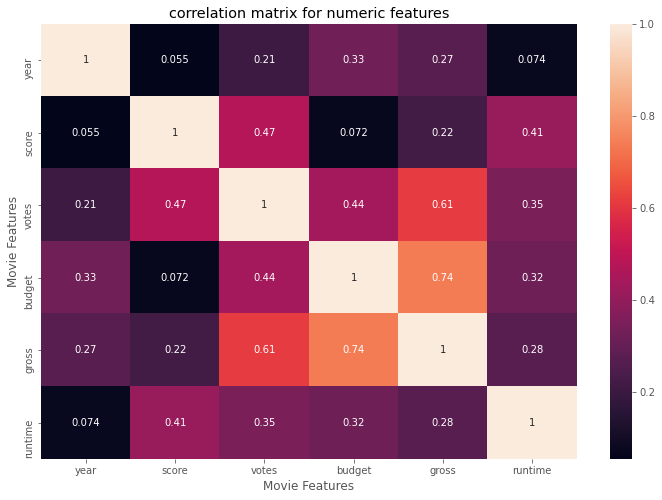

In [19]:
correlation_matrix = df.corr(method = "pearson") 
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [34]:
# Converting object variables to category to look for more correlations

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] =  df_numerized[col_name].cat.codes
    
df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,387,5,0,2009,528,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162.0
7445,389,5,0,2019,138,8.4,903000,106,515,1474,47,356000000,2797501328,987,181.0
3045,4923,5,6,1997,535,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194.0
6663,3656,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138.0
7244,390,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2981,5,0,1993,1471,4.5,1900,1810,3112,187,47,5000000,2970,1382,97.0
3681,1599,3,6,2000,1726,6.8,43000,954,1687,528,6,5000000,2554,468,108.0
272,2921,6,9,1982,1530,3.9,2300,263,55,1477,47,800000,2270,584,85.0
2417,2401,-1,6,1993,64,7.3,5100,23,1220,1687,26,11900000,596,492,134.0


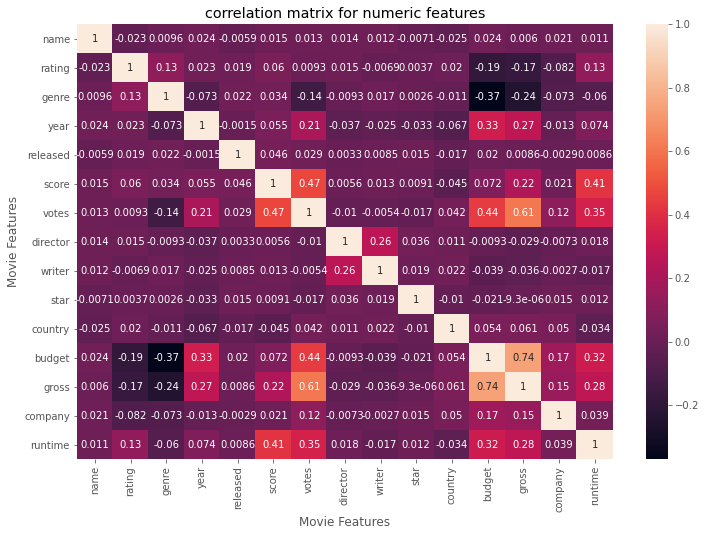

In [27]:
correlation_matrix = df_numerized.corr(method = "pearson") 
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [40]:
# Looking at sorted pairs 
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
sorted_pairs= corr_pairs.sort_values()
sorted_pairs


genre     budget     -0.368900
budget    genre      -0.368900
genre     gross      -0.244380
gross     genre      -0.244380
rating    budget     -0.186892
budget    rating     -0.186892
rating    gross      -0.168814
gross     rating     -0.168814
votes     genre      -0.136457
genre     votes      -0.136457
rating    company    -0.082189
company   rating     -0.082189
genre     company    -0.073293
company   genre      -0.073293
genre     year       -0.073026
year      genre      -0.073026
country   year       -0.066662
year      country    -0.066662
genre     runtime    -0.060186
runtime   genre      -0.060186
country   score      -0.044690
score     country    -0.044690
writer    budget     -0.039420
budget    writer     -0.039420
year      director   -0.036936
director  year       -0.036936
writer    gross      -0.035999
gross     writer     -0.035999
runtime   country    -0.033554
country   runtime    -0.033554
year      star       -0.032770
star      year       -0.032770
gross   

In [44]:
high_correlations = sorted_pairs[(sorted_pairs) > 0.5]
high_correlations

gross     votes       0.614904
votes     gross       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Very high correlation between budget and gross, votes and gross. Movies with high budget and votes on IMDB 
#made more profit 